# DLO - Übungsblatt 01


## Imports


In [221]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

## Reproducibility


In [222]:
np.random.seed(42)

## Generate Data


In [223]:
# Training data
n_samples = 100

x1 = np.random.randint(-10, 10, size=n_samples)
x2 = np.random.randint(-10, 10, size=n_samples)
y = x1 + x2

# Weights
n_initializations = 10

initializations: List[Tuple[int, int]] = [
    (np.random.randint(-10, 10), np.random.randint(-10, 10))
    for _ in range(n_initializations)
]

print(f"Input x1: {x1[:5]}")
print(f"Input x2: {x2[:5]}")
print(f"Target y: {y[:5]}")

print(f"Initializations: {initializations[:5]}")

Input x1: [-4  9  4  0 -3]
Input x2: [ -8   1  -3  -8 -10]
Target y: [-12  10   1  -8 -13]
Initializations: [(-8, 8), (9, -4), (9, -2), (-10, -3), (-4, 7)]


## Hyperparameters


In [224]:
# Learning rate
eta = 1e-3

# Epochs (number of iterations)
epochs = 100

print(f"Learning rate: {eta}")
print(f"Epochs: {epochs}")

Learning rate: 0.001
Epochs: 100


## Training


In [225]:
# List of weights and losses for each initialization
all_weights: List[Tuple[List[float], List[float]]] = []
all_losses: List[List[float]] = []

# Training loop for each initialization
for init in initializations:
    w1, w2 = init
    w1_list, w2_list, loss_list = [w1], [w2], []

    # Epochs loop (batch gradient descent)
    for epoch in range(epochs):
        y_hat = x1 * w1 + x2 * w2
        loss = 0.5 * np.mean((y_hat - y) ** 2)
        loss_list.append(loss)

        # Calculate gradients
        dl_dw1 = np.mean((y_hat - y) * x1)
        dl_dw2 = np.mean((y_hat - y) * x2)

        # Update weights
        w1 -= eta * dl_dw1
        w2 -= eta * dl_dw2
        w1_list.append(w1)
        w2_list.append(w2)

    # Store the weights and losses for this initialization
    all_weights.append((w1_list, w2_list))
    all_losses.append(loss_list)

## Visualization


### Matplotlib


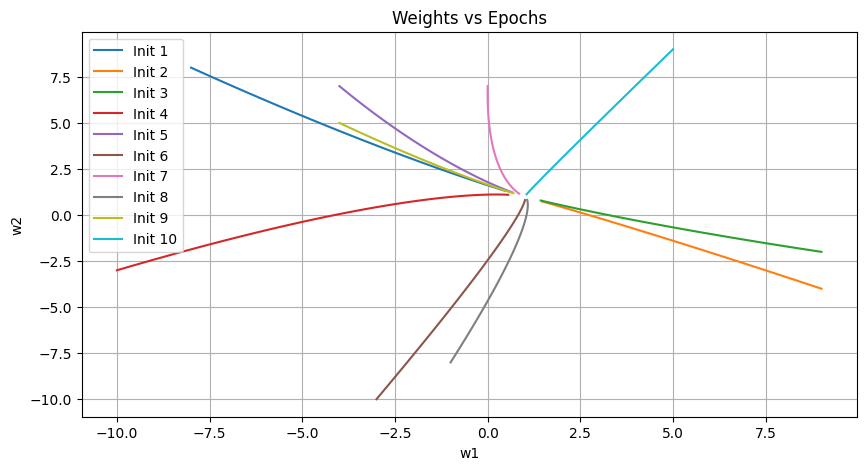

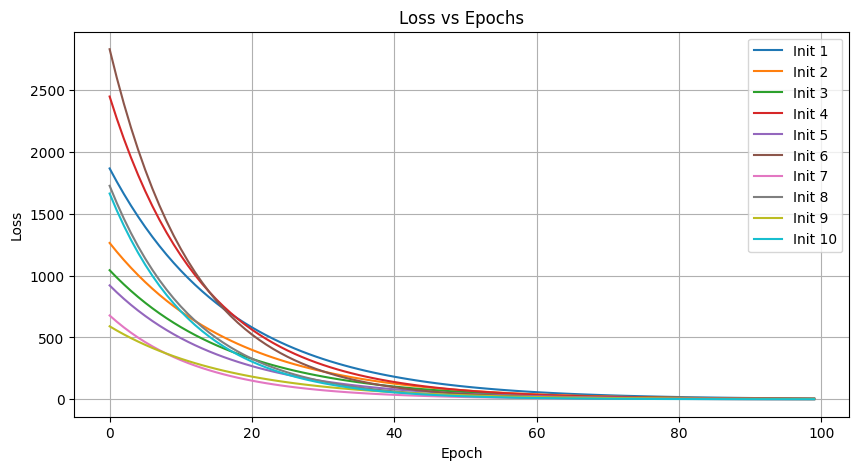

In [226]:
# Weights visualization
plt.figure(figsize=(10, 5))
for i, (w1_list, w2_list) in enumerate(all_weights):
    plt.plot(w1_list, w2_list, label=f"Init {i+1}")
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Weights vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Loss visualization
plt.figure(figsize=(10, 5))
for i, loss_list in enumerate(all_losses):
    plt.plot(loss_list, label=f"Init {i+1}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [227]:
fig_weights = go.Figure()

for i, (w1_list, w2_list) in enumerate(all_weights):
    fig_weights.add_trace(
        go.Scatter(x=w1_list, y=w2_list, mode="lines+markers", name=f"Init {i+1}")
    )

fig_weights.update_layout(
    title="Weights vs Epochs",
    xaxis_title="w1",
    yaxis_title="w2",
    legend_title="Initialization",
    width=1280,
    height=720,
)
fig_weights.show()

In [228]:
fig_loss = go.Figure()

for i, loss_list in enumerate(all_losses):
    fig_loss.add_trace(
        go.Scatter(y=loss_list, mode="lines+markers", name=f"Init {i+1}")
    )

fig_loss.update_layout(
    title="Loss vs Epochs",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    legend_title="Initialization",
    width=1280,
    height=720,
)
fig_loss.show()